### Unzip

In [7]:
# from google.colab import drive
# drive.mount('/content/MyDrive')

In [8]:
# import zipfile

# zip_ref = zipfile.ZipFile("/content/MyDrive/MyDrive/iai/Images-20240617T054507Z-001.zip", 'r')
# zip_ref.extractall("/content/MyDrive/MyDrive/iai/images")
# zip_ref.close()

### Penyesuaian data gambar dan tabular

In [1]:
import tensorflow as tf

print(tf.test.gpu_device_name())

print(tf.config.list_physical_devices('GPU'))

2024-06-23 15:57:14.647262: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-23 15:57:14.934197: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 15:57:14.934219: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 15:57:14.934623: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-23 15:57:15.039500: I tensorflow/core/platform/cpu_feature_g

/device:GPU:0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-06-23 15:57:17.677063: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-23 15:57:17.701297: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-23 15:57:17.701324: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-23 15:57:17.846750: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-23 15:57:17.846777: I tensorflow/compile

In [3]:
# !pip3 install tensorflow
!pip3 install scikit-learn
!pip3 install numpy pandas pillow
# !pip3 install tensorflow[and-cuda]==2.14.0

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Import library
import pandas as pd
import numpy as np

import os
from PIL import Image

import tensorflow as tf
from sklearn.model_selection import train_test_split

pd.set_option('display.max_column', None)

In [5]:
#COLAB ENV

IDENTITY_PATH = "/content/MyDrive/MyDrive/iai/class_identity.txt"
LIST_ATTRIBUTE_PATH = "/content/MyDrive/MyDrive/iai/list_attribute.csv"
IMAGES_PATH = "/content/MyDrive/MyDrive/iai/images/Images"

In [3]:
#LOCAL ENV

IDENTITY_PATH = "./class_identity.txt"
LIST_ATTRIBUTE_PATH = "./list_attribute.csv"
IMAGES_PATH = "./Images"

In [4]:
# Read data list_attribute
df = pd.read_csv(LIST_ATTRIBUTE_PATH)
df.shape

(202599, 41)

In [5]:
df.head()

,Nama_File,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1.0
1,000002.jpg,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0
2,000003.jpg,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1.0
3,000004.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1.0
4,000005.jpg,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1.0


In [6]:
# Read data class_identity
idn = pd.read_csv(IDENTITY_PATH, sep=' ', header=None)
idn.shape

(202599, 2)

In [7]:
idn.head()

,0,1
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295


In [8]:
# Cek jumlah cewe dan cowo
df['Male'].value_counts()

Male
0    118165
1     84434
Name: count, dtype: int64

In [9]:
# Cek jumlah data di dataset csv
file_list = df['Nama_File'].to_list()
len(file_list)

202599

In [10]:
# Cek jumlah data di folder images
folder_list = os.listdir(IMAGES_PATH)
len(folder_list)

5017

In [11]:
# Cek kesesuaian jumlah data di folder images dan di dataset
set_file = set(file_list)
set_folder = set(folder_list)
ada = []
for i in set_file:
  if i in set_folder:
    ada.append(i)
print(len(ada))

5000


In [12]:
# Cek 17 data yang tidak ada pada dataset
tmp = os.listdir(IMAGES_PATH)
tidak_ada = []
for i in tmp:
    if i not in ada:
      tidak_ada.append(i)
print(tidak_ada)

['182793(1).jpg', '182809(1).jpg', '182912(1).jpg', '182943(1).jpg', '183005(1).jpg', '183018(1).jpg', '183050(1).jpg', '183111(1).jpg', '183121(1).jpg', '183145(1).jpg', '189132(1).jpg', '189297(1).jpg', '189324(1).jpg', '189512(1).jpg', '189513(1).jpg', '189581(1).jpg', '189651(1).jpg']


In [13]:
# Membuat dataframe baru untuk 5000 data (semua fitur)
df_final = df[df['Nama_File'].isin(ada)].reset_index(drop=True)
df_final.shape

## Kalau mau disave
# df_final.to_csv('df_final.csv')

(5000, 41)

In [14]:
df_final.head()

,Nama_File,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000051.jpg,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
1,000052.jpg,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0
2,000065.jpg,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1.0
3,000166.jpg,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0
4,000198.jpg,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0


In [15]:
# Membuat dataframe baru untuk 5000 data (hanya jenis kelamin)
tmp = df_final.copy()
tmp['Gender'] = tmp['Male'].replace({-1:'Female',1:'Male'})
df_final_gender = tmp[['Nama_File','Male','Gender']]
df_final_gender.shape

## Kalau mau disave
# df_final_gender.to_csv('df_final_gender.csv')

(5000, 3)

In [16]:
df_final_gender.head()

,Nama_File,Male,Gender
0,000051.jpg,1,Male
1,000052.jpg,1,Male
2,000065.jpg,1,Male
3,000166.jpg,1,Male
4,000198.jpg,0,0


### Pemrosesan Data Gambar

In [17]:
# Fungsi untuk load gambar dan preprocess
def load_and_preprocess_image(file_name, target_size=(128, 128)):
    image_path = os.path.join(IMAGES_PATH, file_name)
    image = Image.open(image_path)
    image = image.resize(target_size)
    image = np.array(image) / 255.0  # Normalize the image
    return image

In [18]:
# Tes hasilnya
load_and_preprocess_image('202320.jpg').shape

(128, 128, 3)

In [19]:
# Preprocess seluruh gambar
images = []
labels = []

for index, row in df_final_gender.iterrows():
    image = load_and_preprocess_image(row['Nama_File'])
    images.append(image)
    labels.append(row['Male'])

In [20]:
print(len(images), len(labels))

5000 5000


In [21]:
# Split data train dan test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [22]:
# Convert ke TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

2024-06-23 15:58:06.396701: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-23 15:58:06.396762: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-23 15:58:06.396772: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-23 15:58:06.396922: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-23 15:58:06.396933: I tensorflow/core/co

### Modelling

In [35]:
# Modelling menggunakan ResNet50 (sesuaikan)
import os
import time
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
from tensorflow.keras.applications import VGG16,VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


base_model = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)


model_resnet = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


# model_resnet.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


# history_resnet = model_resnet.fit(train_dataset, validation_data=test_dataset, epochs=10)


for layer in base_model.layers[-50:]:
    layer.trainable = True


model_resnet.compile(optimizer=Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()
history_resnet = model_resnet.fit(train_dataset, validation_data=test_dataset, epochs=10)
end = time.time()
print(end - start)

80134624/80134624 [==============================] - 18s 0us/step
Epoch 1/10
125/125 [==============================] - 8s 45ms/step - loss: 0.3323 - accuracy: 0.8390 - val_loss: 0.1793 - val_accuracy: 0.9340
Epoch 2/10
125/125 [==============================] - 5s 44ms/step - loss: 0.1595 - accuracy: 0.9333 - val_loss: 0.1789 - val_accuracy: 0.9370
Epoch 3/10
125/125 [==============================] - 6s 44ms/step - loss: 0.1126 - accuracy: 0.9580 - val_loss: 0.1476 - val_accuracy: 0.9460
Epoch 4/10
125/125 [==============================] - 5s 44ms/step - loss: 0.0703 - accuracy: 0.9775 - val_loss: 0.1161 - val_accuracy: 0.9520
Epoch 5/10
125/125 [==============================] - 5s 44ms/step - loss: 0.0427 - accuracy: 0.9877 - val_loss: 0.1294 - val_accuracy: 0.9610
Epoch 6/10
125/125 [==============================] - 6s 44ms/step - loss: 0.0374 - accuracy: 0.9877 - val_loss: 0.1274 - val_accuracy: 0.9600
Epoch 7/10
125/125 [==============================] - 5s 44ms/step - loss: 0

In [38]:
# Load model yang telah dilatih
# model = tf.keras.models.load_model('vgg16_model.h5')

test_folder_path = './test' #(sesuaikan aja)

import time

# List untuk menyimpan gambar dan nama file
test_images = []
test_filenames = []

def load_and_preprocess_test_image(file_name, target_size=(128, 128)):
    image_path = os.path.join(test_folder_path, file_name)
    image = Image.open(image_path)
    image = image.resize(target_size)
    image = np.array(image) / 255.0  # Normalisasi gambar
    return image

# Loop untuk load dan preprocess gambar di folder Test
for filename in os.listdir(test_folder_path):
    image = load_and_preprocess_test_image(filename)
    test_images.append(image)
    test_filenames.append(filename)

# Konversi ke numpy array
test_images = np.array(test_images)

# Prediksi
start_time = time.time()
predictions = model_resnet.predict(test_images)
end_time = time.time()

# Menampilkan hasil prediksi
for i in range(len(test_filenames)):
    gender = 'Male' if predictions[i] > 0.5 else 'Female'
    print(f"File: {test_filenames[i]}, Predicted Gender: {gender}")

print()
print(f"Total prediction time: {end_time - start_time} seconds")

1/1 [==============================] - 1s 912ms/step
File: cew1.jpeg, Predicted Gender: Female
File: cew2.jpg, Predicted Gender: Female
File: cew3.jpeg, Predicted Gender: Female
File: cew4.jpg, Predicted Gender: Female
File: cew5.jpg, Predicted Gender: Female
File: cow1.jpg, Predicted Gender: Male
File: cow2.jpeg, Predicted Gender: Male
File: cow3.jpeg, Predicted Gender: Male
File: cow4.jpg, Predicted Gender: Male
File: cow5.jpeg, Predicted Gender: Female

Total prediction time: 0.9398868083953857 seconds


###### sementara sampai sini dulu

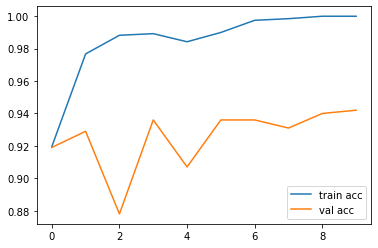

In [26]:
import matplotlib.pyplot as plt
plt.plot(history_resnet.history['accuracy'], label='train acc')
plt.plot(history_resnet.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('plot.jpg')
plt.show()

In [37]:
# Modelling menggunakan ResNet50 (sesuaikan)
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)


model_resnet = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


# model_resnet.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


# history_resnet = model_resnet.fit(train_dataset, validation_data=test_dataset, epochs=10)


for layer in base_model.layers:
    layer.trainable = True


model_resnet.compile(optimizer=Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()
history_resnet = model_resnet.fit(train_dataset, validation_data=test_dataset, epochs=10)
end = time.time()
print(end - start)

171317808/171317808 [==============================] - 38s 0us/step
Epoch 1/10
125/125 [==============================] - 27s 56ms/step - loss: 0.4823 - accuracy: 0.7713 - val_loss: 0.2925 - val_accuracy: 0.8880
Epoch 2/10
125/125 [==============================] - 6s 48ms/step - loss: 0.1254 - accuracy: 0.9815 - val_loss: 0.2479 - val_accuracy: 0.8960
Epoch 3/10
125/125 [==============================] - 6s 49ms/step - loss: 0.0443 - accuracy: 0.9990 - val_loss: 0.2399 - val_accuracy: 0.8990
Epoch 4/10
125/125 [==============================] - 6s 47ms/step - loss: 0.0196 - accuracy: 0.9998 - val_loss: 0.2394 - val_accuracy: 0.9040
Epoch 5/10
125/125 [==============================] - 6s 48ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.2422 - val_accuracy: 0.9070
Epoch 6/10
125/125 [==============================] - 6s 47ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.2438 - val_accuracy: 0.9090
Epoch 7/10
125/125 [==============================] - 6s 47ms/step - loss

In [40]:
# Modelling menggunakan ResNet50 (sesuaikan)
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)


model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
print(len(base_model.layers))
length = len(base_model.layers)
print(len(base_model.layers[int(-(length/2)):]))
# for layer in base_model.layers[int(-(length/2)):]:
for layer in base_model.layers:
    layer.trainable = True


model.compile(optimizer=Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)
end = time.time()
print(end - start)

780
390
Epoch 1/10
125/125 [==============================] - 26s 63ms/step - loss: 0.5559 - accuracy: 0.7107 - val_loss: 0.4250 - val_accuracy: 0.7680
Epoch 2/10
125/125 [==============================] - 6s 51ms/step - loss: 0.2719 - accuracy: 0.9175 - val_loss: 0.3260 - val_accuracy: 0.8640
Epoch 3/10
125/125 [==============================] - 6s 49ms/step - loss: 0.0928 - accuracy: 0.9768 - val_loss: 0.3592 - val_accuracy: 0.8550
Epoch 4/10
125/125 [==============================] - 6s 50ms/step - loss: 0.0272 - accuracy: 0.9945 - val_loss: 0.4287 - val_accuracy: 0.8480
Epoch 5/10
125/125 [==============================] - 6s 49ms/step - loss: 0.0093 - accuracy: 0.9987 - val_loss: 0.4780 - val_accuracy: 0.8450
Epoch 6/10
125/125 [==============================] - 6s 50ms/step - loss: 0.0035 - accuracy: 0.9995 - val_loss: 0.5149 - val_accuracy: 0.8460
Epoch 7/10
125/125 [==============================] - 6s 49ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.5451 - val_accurac